<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/gradient_descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gradient Descent for one feature**
The following describes in detail the algorithm of gradient descent for one single feature x.

###**Cost Function**

In [1]:
def cost_func(x,y,w,b):
  cost = 0
  n = y.shape[0]
  for i in range(n):
    f = w*x[i]+b
    cost += (f -y[i])**2
  cost = cost/(2*n)
  return cost

###**Derivative Function**

In [2]:
def derivative_func(x,y,w,b):
  dw = 0
  db = 0
  n = y.shape[0]
  for i in range(n):
    f = w*x[i] + b
    dw += (f - y[i])*x[i]
    db += (f - y[i])
  dw = dw/n
  db = db/n
  return dw, db

###**Gradient Descent Function**

In [3]:
def grad_desc(x,y,w,b,a,n,derivative_func, cost_func):
  cost_arr = []
  for i in range(n):
    dw,db = derivative_func(x,y,w,b)
    w = w - a * dw
    b = b - a * db
    cost = cost_func(x,y,w,b)
    cost_arr.append(cost)
    if(i%100==0 or i==n-1):
      print("iteration:",i+1,"w:", w,"b:", b, "cost:", cost)
  return w, b, cost, cost_arr

###**Implementation with learning rate = 0.01**

The learning rate has been refined ahead, this is just a starting value.

In [12]:
import numpy as np
x_train = np.array([3,5])
y_train = np.array([30,50])
w = 1
b = 1
a = 0.01
n = 10000

In [5]:
w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a, n, derivative_func, cost_func)

iteration: 1 w: 2.49 b: 1.35 cost: 439.75810000000007
iteration: 101 w: 9.339565362904866 b: 2.7976459389680706 cost: 0.23024051215739977
iteration: 201 w: 9.375373101618957 b: 2.645962002116952 cost: 0.2059507823972854
iteration: 301 w: 9.409239384745288 b: 2.5025021246485672 cost: 0.18422355115792033
iteration: 401 w: 9.441269491530562 b: 2.366820414979559 cost: 0.16478848201589685
iteration: 501 w: 9.471562976553681 b: 2.2384951531462525 cost: 0.14740375828400765
iteration: 601 w: 9.500213996701634 b: 2.1171274841748158 cost: 0.1318530742588818
iteration: 701 w: 9.527311603823819 b: 2.002340178377654 cost: 0.11794294388356959
iteration: 801 w: 9.552940021519124 b: 1.8937764588645787 cost: 0.10550029333871105
iteration: 901 w: 9.577178906916032 b: 1.7910988926244504 cost: 0.09437030760858088
iteration: 1001 w: 9.600103598259423 b: 1.6939883417306432 cost: 0.08441450422840094
iteration: 1101 w: 9.621785349073628 b: 1.6021429714104642 cost: 0.07550901024591822
iteration: 1201 w: 9.6422

###**Result of the model**

In [6]:
print("After 10000 iterations")
print("w:", w,"b:", b, "cost:", cost)

After 10000 iterations
w: 9.997349265409245 b: 0.011228691916751294 cost: 3.7089806903241235e-06


###**Visualizing the cost**

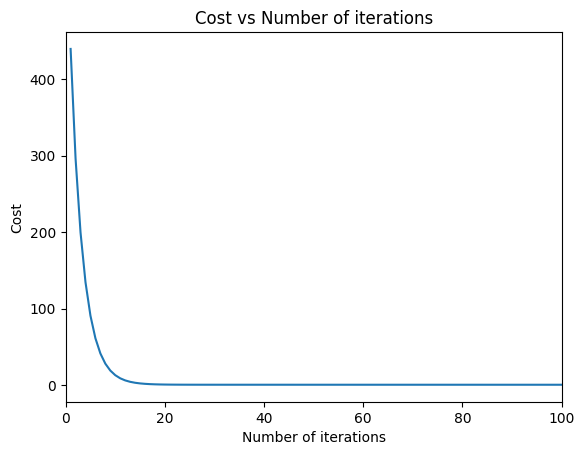

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,10001,1), cost_arr)
plt.xlim([0,100])
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

##**Finding an optimal learning rate**

Let's plot the cost for a variety of learning rates.

iteration: 1 w: 1.149 b: 1.035 cost: 629.784181
iteration: 40 w: 5.279480251821813 b: 2.003290665567403 cost: 153.58840104275913
iteration: 1 w: 5.496187270992092 b: 2.0539270305488393 cost: 137.52409463762862
iteration: 40 w: 8.867665170298114 b: 2.8295651380794244 cost: 2.0857072160129806
iteration: 1 w: 8.946979485824258 b: 2.8465628798867058 cost: 1.4867474127639555
iteration: 40 w: 9.32262651466889 b: 2.8686787258659976 cost: 0.24208731712957882
iteration: 1 w: 9.323845545083836 b: 2.863903182329751 cost: 0.2412783368311639
iteration: 40 w: 9.366629881783739 b: 2.6829988756811596 cost: 0.21175672971498352
iteration: 1 w: 9.370159532478919 b: 2.6680470353995482 cost: 0.20940314645599492
iteration: 40 w: 9.493502617986875 b: 2.145557340633284 cost: 0.1354180298957514


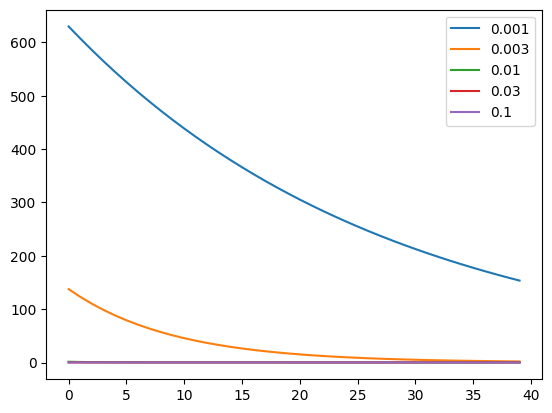

In [29]:
w = 1
b = 1
n = 40
a = [0.001,0.003,0.01,0.03,0.1]
y = []
for i in range(len(a)):
  w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a[i], n, derivative_func, cost_func)
  y.append(cost_arr)

for i in range(len(a)):
  plt.plot(np.arange(0,40,1),y[i],label=a[i])
plt.legend()
plt.show()

It is clear that 0.0001 is very slow and 0.1 is large but not too large that the cost increases with number of iterations.

##**Visualizing fast verses slow learning rates**

iteration: 1 w: 1.149 b: 1.035 cost: 629.784181
iteration: 100 w: 7.9476347185687555 b: 2.6227491584391602 cost: 17.71177692691945
iteration: 1 w: 10.387556033626208 b: 3.181420355167742 cost: 11.269329627924463
iteration: 100 w: 9.602662229726635 b: 1.6831498042914486 cost: 0.08333775207969249


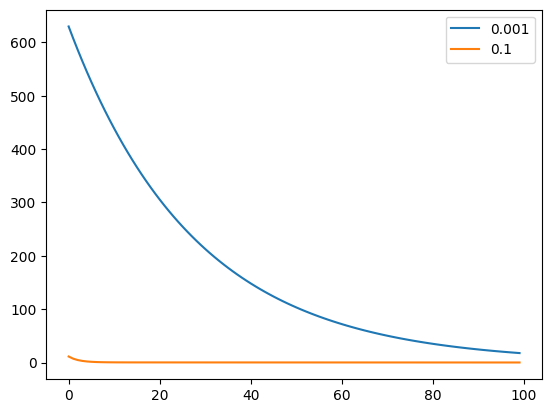

In [33]:
w = 1
b = 1
n = 100
a = [0.001,0.1]
y = []
for i in range(len(a)):
  w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a[i], n, derivative_func, cost_func)
  y.append(cost_arr)

for i in range(len(a)):
  plt.plot(np.arange(0,100,1),y[i],label=a[i])
plt.legend()
plt.show()

Conclusions:

0.001 - Slow learning rate

0.01 - Fast learning rate

##**Checking if we can do better**

Increase the learning rate and check if the cost function still continues to decrease.

iteration: 1 w: 1.149 b: 1.035 cost: 629.784181
iteration: 100 w: 7.9476347185687555 b: 2.6227491584391602 cost: 17.71177692691945
iteration: 1 w: 10.387556033626208 b: 3.181420355167742 cost: 11.269329627924463
iteration: 100 w: 9.602662229726635 b: 1.6831498042914486 cost: 0.08333775207969249
iteration: 1 w: 9.609305092971061 b: 1.6550101873320526 cost: 0.08057449321585036
iteration: 100 w: -2.0801856610004073e+54 b: -4.910652218164293e+53 cost: 4.098756512416235e+109


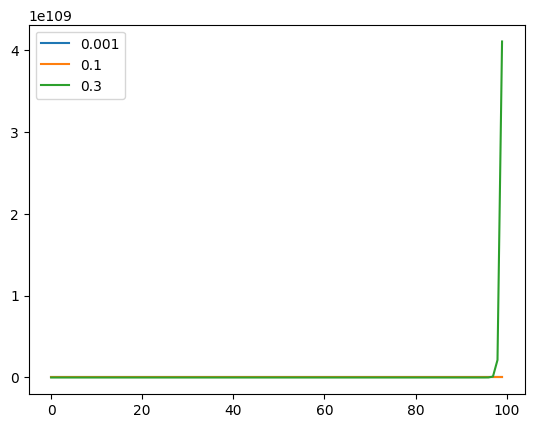

In [32]:
w = 1
b = 1
n = 100
a = [0.001,0.1,0.3]
y = []
for i in range(len(a)):
  w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a[i], n, derivative_func, cost_func)
  y.append(cost_arr)

for i in range(len(a)):
  plt.plot(np.arange(0,100,1),y[i],label=a[i])
plt.legend()
plt.show()

##**Conclusion: Set the learning rate to 0.1**

In [34]:
import numpy as np
x_train = np.array([3,5])
y_train = np.array([30,50])
w = 1
b = 1
a = 0.1
n = 10000

In [35]:
w,b,cost,cost_arr = grad_desc(x_train, y_train, w, b, a, n, derivative_func, cost_func)

iteration: 1 w: 15.9 b: 4.5 cost: 412.21000000000004
iteration: 101 w: 9.60266836170258 b: 1.6831238324254831 cost: 0.08333518019207553
iteration: 201 w: 9.772777027894861 b: 0.962531955886906 cost: 0.02725376794504336
iteration: 301 w: 9.870057468399038 b: 0.5504453970300839 cost: 0.008913016873429894
iteration: 401 w: 9.925689461050384 b: 0.3147844944352242 cost: 0.002914894921914694
iteration: 501 w: 9.957503858583115 b: 0.18001654382337315 cost: 0.0009532813105214929
iteration: 601 w: 9.975697632383632 b: 0.10294648123711944 cost: 0.0003117591821775748
iteration: 701 w: 9.9861021482876 b: 0.05887224459493621 cost: 0.0001019570892655447
iteration: 801 w: 9.99205220309112 b: 0.03366740797738293 cost: 3.334383923801124e-05
iteration: 901 w: 9.995454874824398 b: 0.01925345921009804 cost: 1.0904701410566107e-05
iteration: 1001 w: 9.997400768653412 b: 0.011010520673404262 cost: 3.566251384688875e-06
iteration: 1101 w: 9.998513571500878 b: 0.006296612165977895 cost: 1.1662996041765428e-06

In [36]:
print("After 10000 iterations")
print("w:", w,"b:", b, "cost:", cost)

After 10000 iterations
w: 9.99999999999999 b: 2.845929244482882e-14 cost: 2.0510383535746307e-28


##**Comparing costs**
0.001 - cost: 3.7089806903241235e-06

0.1 - cost: 2.0510383535746307e-28

The cost defers by several orders of magnitude!

##**Final model**

In [37]:
print("w:", w,"b:", b, "cost:", cost)

w: 9.99999999999999 b: 2.845929244482882e-14 cost: 2.0510383535746307e-28


y = 10x is the line that fits the data best.